<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [72]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [73]:
# Read CSV
house = pd.read_csv( "Sacramento_transactions.csv")
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [74]:
# ANSWER
y= house['price']

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [75]:
# ANSWER
#longitude
#type
#sq__ft
#baths
#beds
#city
#state

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [76]:
# ANSWER
house.corr()['price'].sort_values(ascending=False)

price        1.000000
baths        0.416208
beds         0.342024
sq__ft       0.333897
longitude    0.284485
latitude    -0.039573
zip         -0.093353
Name: price, dtype: float64

<AxesSubplot:>

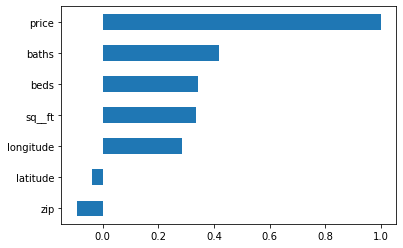

In [77]:
house.corr()['price'].sort_values(ascending=True).plot(kind = 'barh')

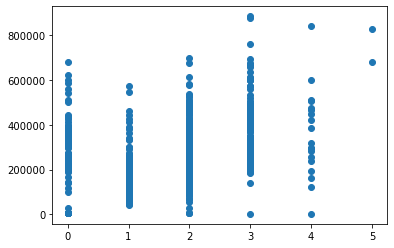

In [78]:
plt.scatter(house['baths'], house['price'])
plt.show()

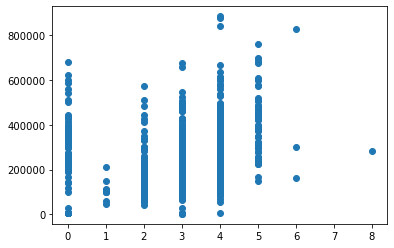

In [79]:
plt.scatter(house['beds'], house['price'])
plt.show()

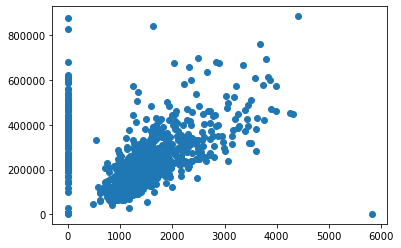

In [80]:
plt.scatter(house['sq__ft'], house['price'])
plt.show()

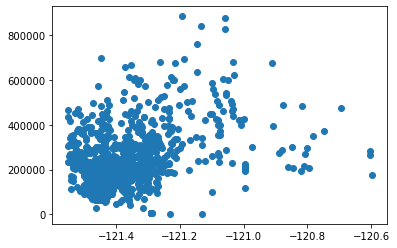

In [81]:
plt.scatter(house['longitude'], house['price'])
plt.show()

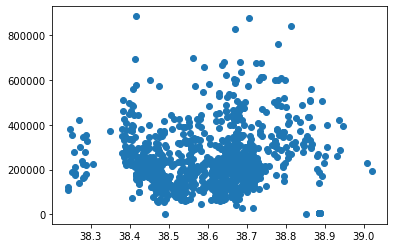

In [82]:
plt.scatter(house['latitude'], house['price'])
plt.show()

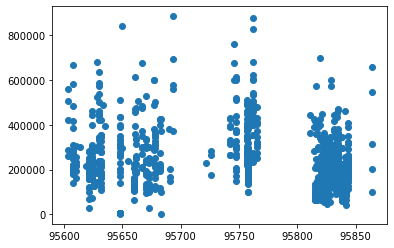

In [83]:
plt.scatter(house['zip'], house['price'])
plt.show()

In [84]:
house_0_sqft = house[house['sq__ft']==0]
house_0_sqft.shape

(171, 12)

In [85]:
house.drop(house[house['sq__ft'] ==0].index, inplace = True)

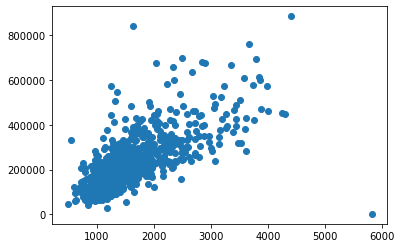

In [86]:
plt.scatter(house['sq__ft'], house['price'])
plt.show()

### baths, beds and sq__ft are good relation with target price, however, after used scatterplot to see relation with target, sq__ft is  best correlation with target. Therefore we chose sq__ft as best predictor for price.

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [87]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [88]:
# ANSWER

X = house['sq__ft'].values.reshape(-1,1)
y = house['price']

In [90]:
linreg = LinearRegression()
linreg.fit(X, y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.63386691903


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [91]:
# ANSWER
linreg.score(X, y)

0.4812307133326901

### 3. Splitting Data

In [92]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [93]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [94]:
# ANSWER
## Check training/test data
X_train.shape

(545, 1)

In [95]:
y_train.shape

(545,)

In [96]:
X_test.shape

(269, 1)

In [97]:
y_test.shape

(269,)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [98]:
# ANSWER
linreg.fit(X_train, y_train)

LinearRegression()

In [99]:
# ANSWER
linreg.score(X_test, y_test)

0.44917703281062393

In [100]:
linreg.score(X_train, y_train)

0.49300843934238503

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [101]:
# ANSWER
linreg.predict([[1204]])

array([182611.9071335])

In [104]:
y_pred = linreg.predict(X_test)
y_pred[:10]

array([302268.49758545, 203939.29942131, 193399.59974419, 234690.42318513,
       208155.17929215, 235062.4125855 , 249074.01333272, 153596.73390474,
       265937.5328161 , 247090.06986409])

#### Find the error

In [103]:
# Predict price from X_test
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=True)

6873464361.755377



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



